<a href="https://colab.research.google.com/github/XJTellez/ejer_ximena/blob/main/ejerc_ximena.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Matriz W:
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


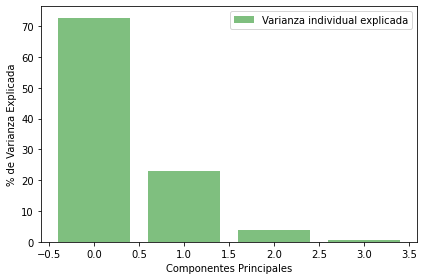

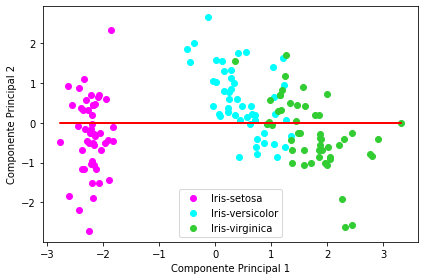

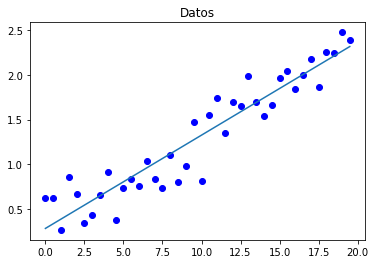

In [ ]:
import numpy as np
# import matplotlib.pyplot as plt
# from scipy.cluster.hierarchy import dendrogram, linkage

# x=np.random.uniform(0,1,100)
# plt.hist(x,bins=[0.0,0.1,0.2,0.7,0.8,0.9,1.0])

# puntos = np.array([[5,3],
#     [10,15],
#     [15,12],
#     [24,10],
#     [30,30],
#     [85,70],
#     [71,80],
#     [60,78],
#     [70,55],
#     [80,91],])
# from scipy.cluster.hierarchy import dendrogram, linkage
# from matplotlib import pyplot as plt

# linked = linkage(puntos, 'single')

# labelList = range(1, 11)

# plt.figure(figsize=(10, 7))
# dendrogram(linked,
#             orientation='top',
#             labels=labelList,
#             distance_sort='descending',
#             show_leaf_counts=True)
# plt.show()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"


df = pd.read_csv(url, names=['lng sepalo','anch sepalo','lng petalo','anch petalo','especie'])

df.tail()
X = df.iloc[:,0:4].values
# la submatriz x contiene los valores de las primeras 4 columnas del dataframe y todas las filas

y = df.iloc[:,4].values
# El vector y contiene los valores de la 4 columna (especie) para todas las filas
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
#######Paréntesis
# x1=[]
# for i in range(0,len(X)):
#     x1.append(X[i][0])
# mean1=np.mean(x1)
# ds1=np.std(x1)
# for i in range(0,len(x1)):
#     x1[i]=(x1[i]-mean1)/ds1
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)
#####Los eigenvectores están por columna.  [:,i] para tomarlos.
tot = sum(eig_vals)
var_exp = []
for i in eig_vals:
    var_exp.append((i/tot)*100)
cum_var_exp = np.cumsum(var_exp)
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Ordenamos estas parejas en orden descendiente con la función sort
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Representamos en un diagrama de barras la varianza explicada por cada autovalor, y la acumulada
plt.figure(figsize=(6, 4))

plt.bar(range(4), var_exp, alpha=0.5, align='center',
        label='Varianza individual explicada', color='g')
plt.ylabel('% de Varianza Explicada')
plt.xlabel('Componentes Principales')
plt.legend(loc='best')
plt.tight_layout()
####Se puede agregar un acumulado
# plt.figure(figsize=(6, 4))

# plt.bar(range(1,5), cum_var_exp, alpha=0.5, align='center',
#         label='Varianza acumulada explicada', color='g')
# plt.ylabel('% de Varianza Explicada')
# plt.xlabel('Componentes Principales')
# plt.legend(loc='best')
# plt.tight_layout()
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

print('Matriz W:\n', matrix_w)

Y = X_std.dot(matrix_w)

plt.figure(figsize=(6, 4))
for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                    ('magenta', 'cyan', 'limegreen')):
    plt.scatter(Y[y==lab, 0],
                Y[y==lab, 1],
                label=lab,
                c=col)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(loc='lower center')
plt.tight_layout()

##manera de regresion.
A=[]
y_es=[]
for i in range(0,len(Y)):
    A.append([Y[i][0],1])
    y_es.append(Y[i][1])
A=np.array(A)
m, c=np.linalg.lstsq(np.array(A),np.array(y_es),rcond=None)[0]
plt.plot(A[:,0], m*A[:,0] + c, 'r', label='Fitted line')
plt.show()
### otra manera
#corr_test = pearsonr(x, y) 2-vector(coef, p-value)
x = np.arange(0, 20, 0.5) # generamos valores x de 0 a 20 en intervalos de 0.5
y = .1*x+.25+np.random.normal(0,.2,len(x)) # calculamos y a partir de la función que hemos generado
# hacemos un gráfico de los datos que hemos generado
plt.scatter(x,y,label='data', color='blue')
plt.title('Datos');
from sklearn import linear_model
modelo = linear_model.LinearRegression()
 
modelo.fit(x.reshape(-1, 1), y)
plt.plot(x,x*modelo.coef_[0]+modelo.intercept_) 
plt.show()